In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import get_trial_dataframe
from utils import get_trial_paths
from utils import analysis_pipeline
from utils import modeling

In [3]:
# Replace with the path to the logs directory in multi-memory-task
logs_path = 'C:\\Users\\isami\\Dropbox\\multi-memory' 

# Replace this with the name of the dataset directories
datasets = ["2023_07_18_11_31_09",
"2023_07_18_11_58_28"]

# "2023_07_18_13_44_54",
# "2023_07_18_13_46_05",
# "2023_07_18_14_06_59",
# "2023_07_18_17_16_22",
# "2023_07_19_10_01_36",
# "2023_07_19_10_22_23",
# "2023_07_18_11_08_50"]

trial_paths = get_trial_paths.get_trial_paths(logs_path=logs_path, datasets=datasets)
df = get_trial_dataframe.get_trial_dataframe(trial_paths=trial_paths)


Number of trials:  294


In [22]:
df.columns

Index(['trial_num', 'time', 'block_id', 'visible', 'ltm', 'object_0_x',
       'object_0_y', 'object_0_id', 'object_0_theta', 'object_1_x',
       'object_1_y', 'object_1_id', 'object_1_theta', 'object_2_x',
       'object_2_y', 'object_2_id', 'object_2_theta', 'object_3_x',
       'object_3_y', 'object_3_id', 'object_3_theta', 'object_4_x',
       'object_4_y', 'object_4_id', 'object_4_theta', 'object_5_x',
       'object_5_y', 'object_5_id', 'object_5_theta', 'target_id', 'target_x',
       'target_y', 'target_theta', 'num_object', 'response_object_ind',
       'response_x', 'response_id', 'response_theta', 'correct',
       'reaction_time_steps', 'response_y', 'visible_s', 'delay_s',
       'rounded_delay_s', 'precision_difference_0',
       'precision_difference_0_abs', 'rounded_visible_s',
       'precision_difference', 'delay_bins'],
      dtype='object')

<Axes: xlabel='delay_bins', ylabel='Accuracy'>

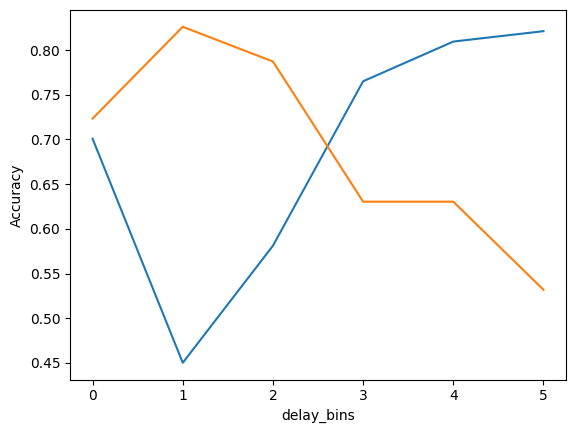

In [29]:
precision_difference_arr = []

for (row_index,row_data) in df.iterrows():
    precision_difference_arr.append(analysis_pipeline.find_angular_dist(row_data['object_0_theta'],row_data['response_theta']))

df['precision_difference_0'] = precision_difference_arr
df['precision_difference_0_abs'] = df['precision_difference_0'].abs()

ylabel = 'Angular Distance from Target (rad)'

analysis_pipeline.round('delay_s',df)
df['delay_bins'] = pd.qcut(df['delay_s'],6,labels=np.arange(6),duplicates='drop')
df.groupby('delay_bins').precision_difference_0_abs.mean().plot(ylabel="Angular Error (rad)")
df.groupby('delay_bins').correct.mean().plot(ylabel="Accuracy")

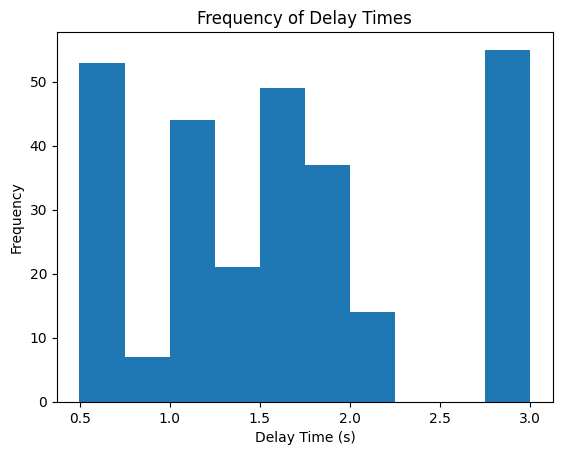

In [5]:
analysis_pipeline.plot_hist('delay_s',df,"Delay Time (s)", "Frequency of Delay Times")

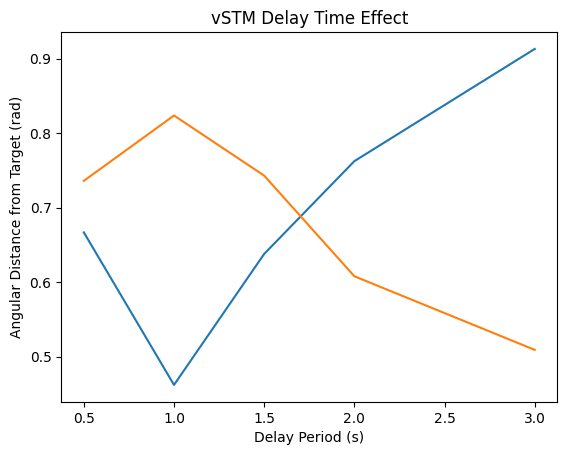

In [6]:
analysis_pipeline.round('delay_s',df)
analysis_pipeline.plot_error('rounded_delay_s',df,'Delay Period (s)','vSTM Delay Time Effect on Error')
analysis_pipeline.plot_accuracy('rounded_delay_s',df,'Delay Period (s)','vSTM Delay Time Effect')

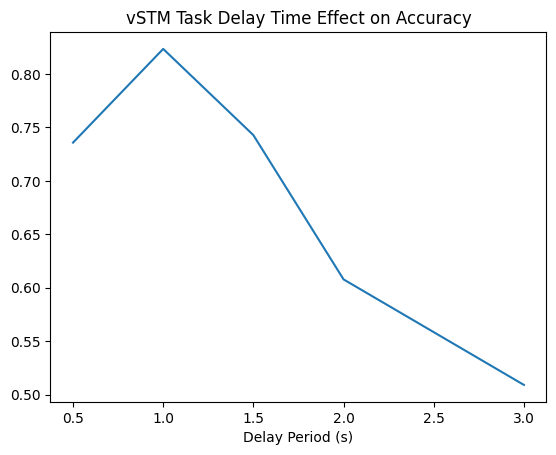

In [7]:
analysis_pipeline.plot_accuracy('rounded_delay_s',df,'Delay Period (s)','vSTM Task Delay Time Effect on Accuracy')

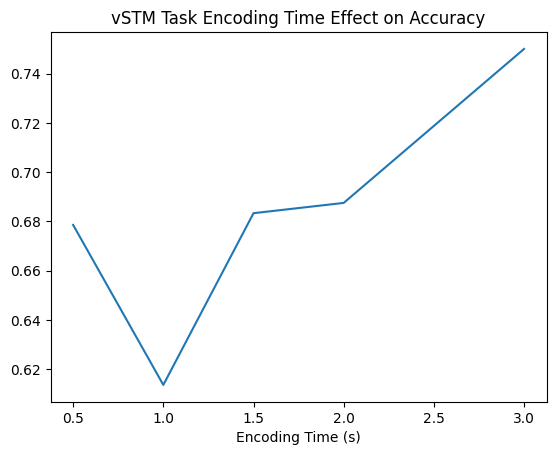

In [8]:
analysis_pipeline.round('visible_s',df)
analysis_pipeline.plot_accuracy('rounded_visible_s',df,'Encoding Time (s)','vSTM Task Encoding Time Effect on Accuracy')

<Axes: xlabel='rounded_delay_s', ylabel='mean_accuracy'>

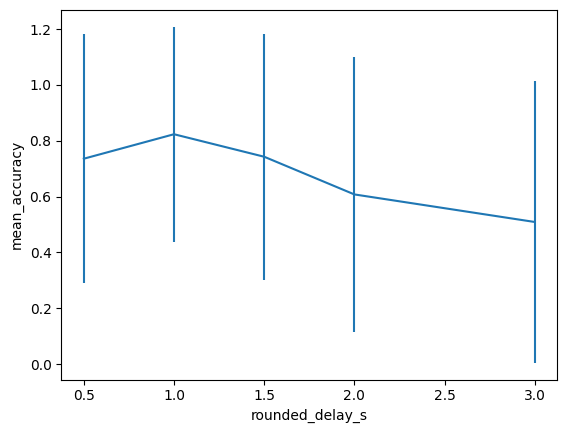

In [9]:
delay_std = df.groupby('rounded_delay_s').correct.std()
df.groupby('rounded_delay_s').correct.mean().plot(ylabel='mean_accuracy', yerr=delay_std)

<Axes: xlabel='rounded_visible_s', ylabel='mean_accuracy'>

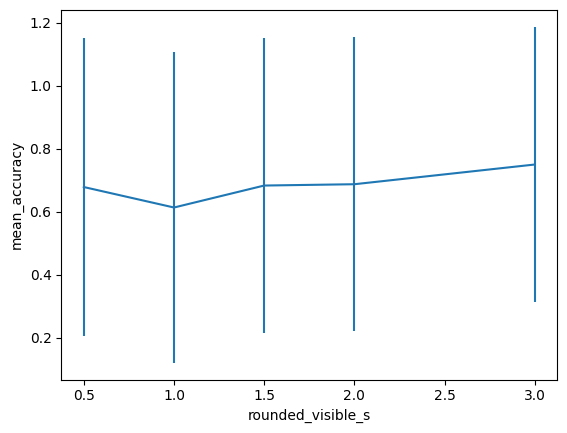

In [10]:
delay_std = df.groupby('rounded_visible_s').correct.std()
df.groupby('rounded_visible_s').correct.mean().plot(ylabel='mean_accuracy', yerr=delay_std)

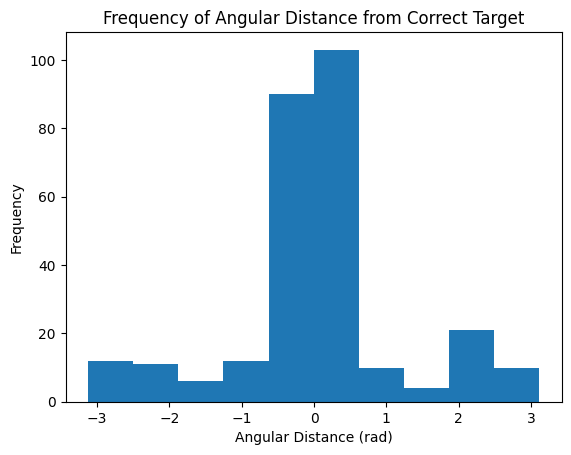

In [11]:
# plotting the distribution of distance from the response to the correct response
analysis_pipeline.plot_hist('precision_difference_0',df,"Angular Distance (rad)","Frequency of Angular Distance from Correct Target")


In [12]:
df['correct']

0       True
1      False
2       True
3      False
4      False
       ...  
275     True
276     True
277     True
278     True
279     True
Name: correct, Length: 280, dtype: bool

In [15]:
df = df[pd.isna(df['response_object_ind'])==False]
sum(pd.isna(df['response_object_ind']))

0

c:\Users\isami\multi-memory-analysis\notebooks\..\utils\analysis_pipeline.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precision_difference'] = response_precision_arr


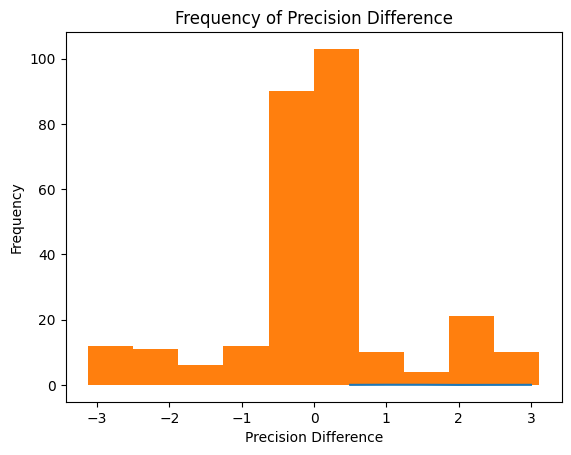

In [16]:
#plotting the distribution of distance from the response to the actual target (regardless of correctness)
analysis_pipeline.plot_precision('rounded_delay_s',df,"Delay Time", "delay effect on precision")
analysis_pipeline.plot_hist("precision_difference_0",df,"Precision Difference", "Frequency of Precision Difference")


Text(0.5, 0, '')

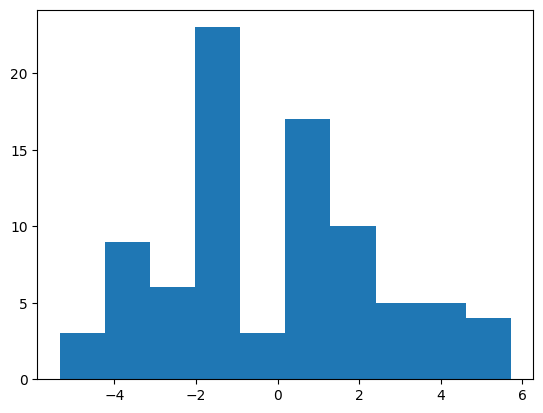

In [ ]:
#plotting distribution of how incorrect you are. 
#isolated by incorrect trials and distance from the target is calculated
i = 0
s = 'object_' + str(i) + '_theta'
response_precision_arr = []

for (row_index,row_data) in df.iterrows():
    if (row_data['correct'] == False):
        i = row_data['response_object_ind']
        response_precision_arr.append(row_data[s] - row_data['response_theta'])

plt.hist(response_precision_arr)
plt.xlabel('')

In [ ]:
df

,trial_num,time,object_0_x,object_0_y,object_0_id,object_0_theta,object_1_x,object_1_y,object_1_id,object_1_theta,...,response_id,response_theta,correct,response_y,visible_s,delay_s,rounded_visible_s,rounded_delay_s,precision_difference,precision_difference_0
0,1,1.686601e+09,0.218135,0.707491,a,-0.936228,0.160940,0.413176,c,-1.821483,...,a,-0.875039,True,0.680703,0.799808,0.812311,0.8,0.8,-0.001068,-0.000374
3,4,1.686601e+09,0.537909,0.847941,b,0.108525,0.286410,0.222729,f,-2.485206,...,b,0.050921,True,0.784535,1.200918,1.200648,1.2,1.2,0.001005,0.000352
4,5,1.686601e+09,0.172791,0.624234,d,-1.207932,0.677491,0.801657,h,0.531837,...,d,-1.187918,True,0.659963,2.400211,1.600977,2.4,1.6,-0.000349,-0.000122
6,7,1.686601e+09,0.513272,0.849748,h,0.037928,0.849716,0.485912,b,1.611060,...,h,-0.022361,True,0.819675,0.799023,0.399859,0.8,0.4,0.001052,0.000368
8,9,1.686601e+09,0.450077,0.846421,d,-0.143126,0.161907,0.590517,f,-1.309203,...,d,0.020260,True,0.812267,0.398743,1.601225,0.4,1.6,-0.002852,-0.000998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,210,1.686603e+09,0.525069,0.849101,a,0.071686,0.527967,0.151119,d,3.061603,...,a,0.029322,True,0.909291,0.800830,0.399294,0.8,0.4,0.000739,0.000259
208,211,1.686603e+09,0.203861,0.313447,d,-2.132948,0.168820,0.613224,h,-1.241374,...,d,-1.926556,True,0.386340,1.600446,0.400395,1.6,0.4,-0.003602,-0.001261
209,212,1.686603e+09,0.695186,0.209479,b,2.550011,0.153833,0.551657,a,-1.422665,...,d,0.166949,False,0.837094,1.199853,1.600677,1.2,1.6,0.000356,0.014557
210,213,1.686603e+09,0.298726,0.786337,d,-0.612688,0.372080,0.174214,f,-2.767438,...,d,-0.408804,True,0.815126,1.600132,0.400060,1.6,0.4,-0.003558,-0.001245


<Axes: title={'center': 'vSTM Task Delay Time Effect on Error'}, xlabel='Delay Time (s)', ylabel='Error (rad)'>

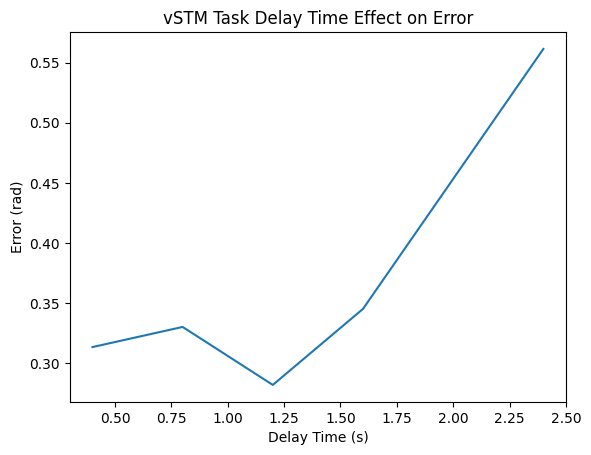

In [ ]:
df['precision_difference_0_abs'] = df['precision_difference_0'].abs()
df.groupby('rounded_delay_s').precision_difference_0_abs.mean().plot(xlabel= 'Delay Time (s)', ylabel='Error (rad)', title='vSTM Task Delay Time Effect on Error')

<Axes: title={'center': 'vSTM Task Encoding Time Effect on Error'}, xlabel='Encoding Time (s)', ylabel='Error (rad)'>

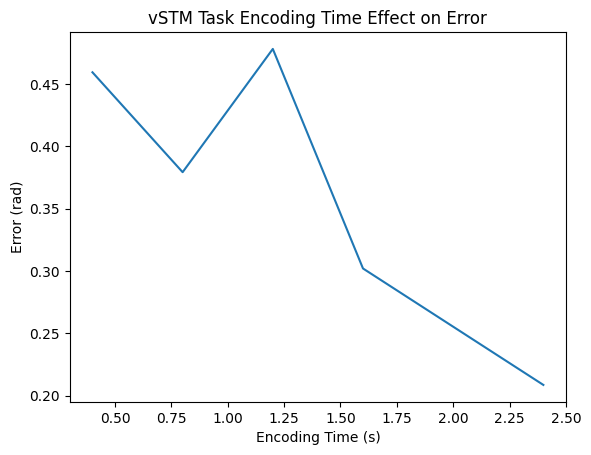

In [ ]:
delay_std = df.groupby('rounded_visible_s').correct.std()
df['precision_difference_0_abs'] = df['precision_difference_0'].abs()
df.groupby('rounded_visible_s').precision_difference_0_abs.mean().plot(xlabel= 'Encoding Time (s)', ylabel='Error (rad)', title='vSTM Task Encoding Time Effect on Error')

In [ ]:
df['num_object']

0      5
3      5
4      5
6      4
8      5
      ..
403    4
405    3
406    5
407    5
408    5
Name: num_object, Length: 315, dtype: int64

<Axes: title={'center': 'vSTM Task Set Size Effect on Accuracy'}, xlabel='Set Size', ylabel='Accuracy'>

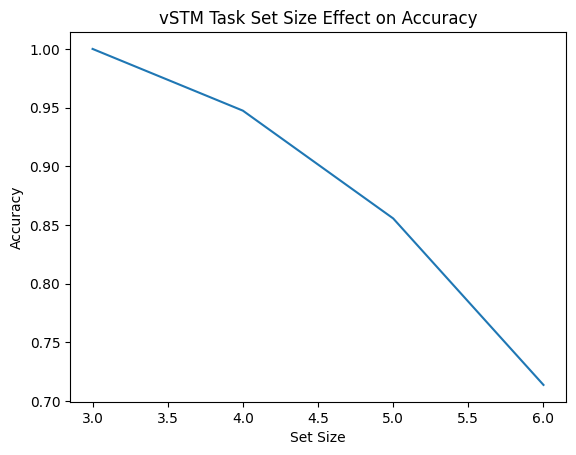

In [ ]:
df.groupby('num_object').correct.mean().plot(xlabel= 'Set Size', ylabel='Accuracy', title='vSTM Task Set Size Effect on Accuracy')

<Axes: title={'center': 'vSTM Task Set Size Effect on Error'}, xlabel='Set Size', ylabel='Error (rad)'>

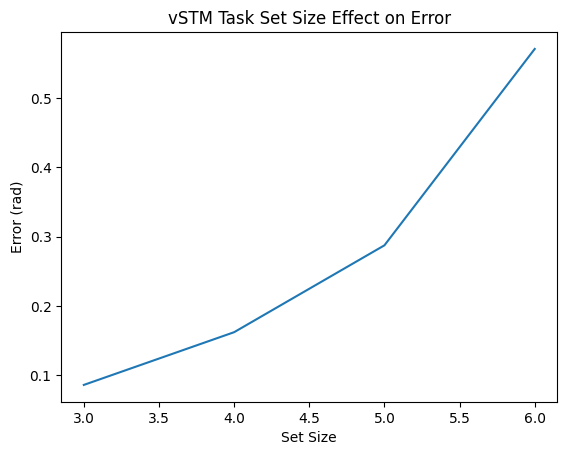

In [ ]:
df.groupby('num_object').precision_difference_0_abs.mean().plot(xlabel= 'Set Size', ylabel='Error (rad)', title='vSTM Task Set Size Effect on Error')

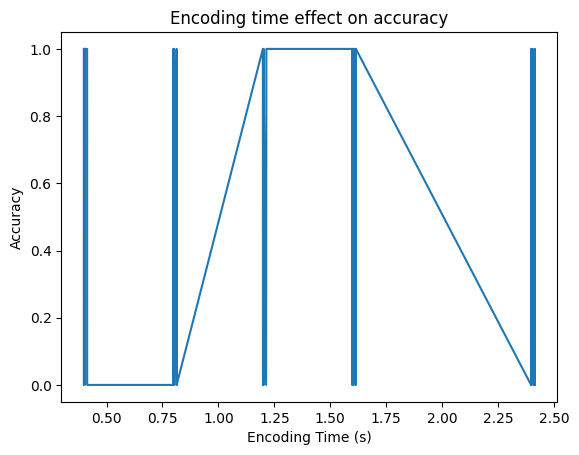

In [ ]:
analysis_pipeline.plot_accuracy("visible_s",df, "Encoding Time (s)", "Encoding time effect on accuracy" )

In [ ]:
analysis_pipeline.plot_SD(df,'rounded_delay_s')

AttributeError: 'DataFrameGroupBy' object has no attribute 'precision_difference_0_abs'

In [ ]:
analysis_pipeline.plot_SD(df,'rounded_visible_s')

KeyError: 'rounded_visible_s'

In [ ]:
df.delay_s.unique()

array([0.81231117, 0.799963  , 1.60071206, 1.20064831, 1.60097718,
       0.79985094, 0.39985895, 0.39957213, 1.60122514, 1.60059977,
       1.59971976, 0.40072775, 0.80047321, 0.800488  , 1.20034218,
       1.60047078, 1.20042205, 1.61445117, 2.4014318 , 1.60022187,
       1.20138907, 1.20128584, 1.20036674, 1.6012671 , 2.4126389 ,
       2.4008379 , 1.20044398, 1.60043812, 0.80166173, 0.80055022,
       2.40099716, 2.40134025, 0.40061522, 0.80010176, 1.200387  ,
       0.40079713, 2.4017849 , 1.60113502, 2.41415715, 0.39975977,
       0.79970407, 0.39992809, 0.40164924, 0.80054402, 1.20153117,
       1.600739  , 2.40076518, 0.80002093, 0.39967895, 2.40106201,
       2.40078807, 0.41263103, 0.39963984, 1.20043397, 0.40022087,
       2.40109682, 0.79998493, 1.20156884, 0.39933395, 0.4002111 ,
       1.19939494, 0.40062404, 1.60030723, 0.39990711, 0.40030098,
       2.40050507, 1.21321774, 0.39884281, 1.20125532, 0.79932404,
       0.39949083, 0.39970708, 1.20044589, 1.20059299, 2.40176

In [ ]:
df.columns

Index(['trial_num', 'time', 'block_id', 'visible', 'ltm', 'object_0_x',
       'object_0_y', 'object_0_id', 'object_0_theta', 'object_1_x',
       'object_1_y', 'object_1_id', 'object_1_theta', 'object_2_x',
       'object_2_y', 'object_2_id', 'object_2_theta', 'object_3_x',
       'object_3_y', 'object_3_id', 'object_3_theta', 'object_4_x',
       'object_4_y', 'object_4_id', 'object_4_theta', 'object_5_x',
       'object_5_y', 'object_5_id', 'object_5_theta', 'target_id', 'target_x',
       'target_y', 'target_theta', 'num_object', 'response_object_ind',
       'response_x', 'response_id', 'response_theta', 'correct',
       'reaction_time_steps', 'response_y', 'visible_s', 'delay_s',
       'rounded_delay_s', 'precision_difference_0',
       'precision_difference_0_abs'],
      dtype='object')

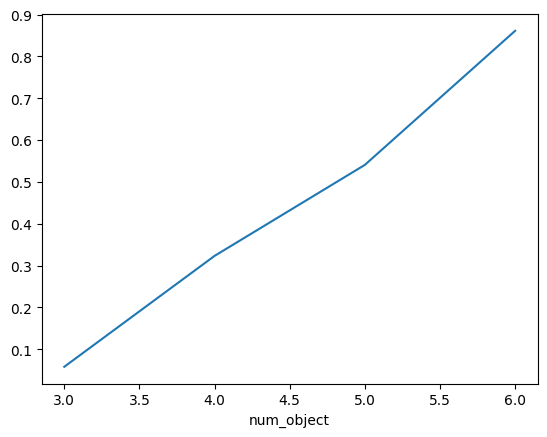

In [ ]:
analysis_pipeline.plot_SD(df,'num_object')

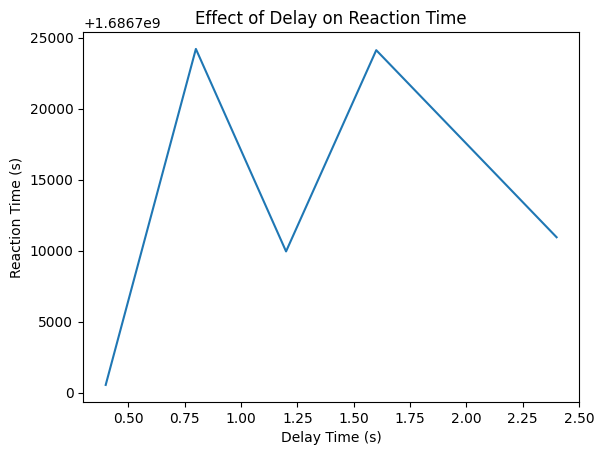

In [ ]:
analysis_pipeline.plot_rt('rounded_delay_s',df,"Delay Time (s)","Effect of Delay on Reaction Time")

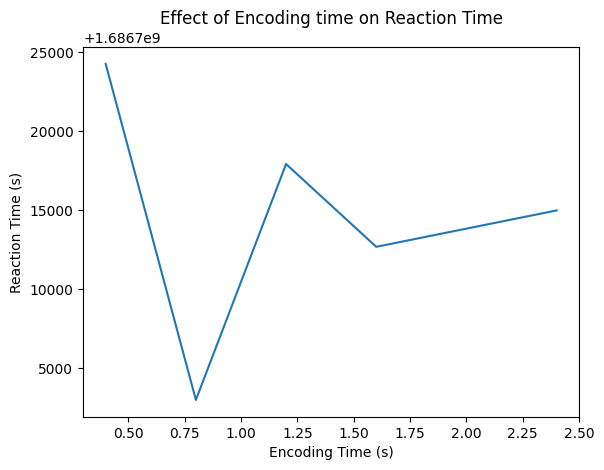

In [ ]:
analysis_pipeline.plot_rt('rounded_visible_s',df,"Encoding Time (s)","Effect of Encoding time on Reaction Time")

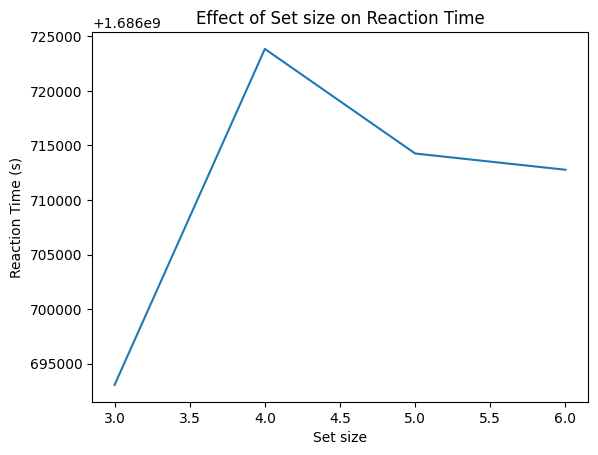

In [ ]:
analysis_pipeline.plot_rt('num_object',df,"Set size","Effect of Set size on Reaction Time")

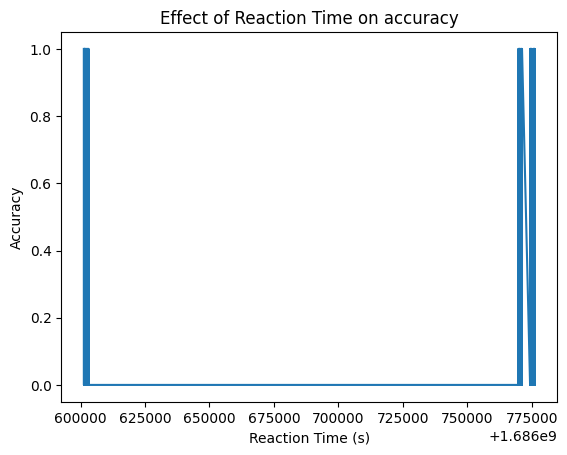

In [ ]:
analysis_pipeline.round('time',df)
analysis_pipeline.plot_accuracy('rounded_time',df,'Reaction Time (s)', 'Effect of Reaction Time on accuracy')

Index(['trial_num', 'time', 'block_id', 'visible', 'ltm', 'object_0_x',
       'object_0_y', 'object_0_id', 'object_0_theta', 'object_1_x',
       'object_1_y', 'object_1_id', 'object_1_theta', 'object_2_x',
       'object_2_y', 'object_2_id', 'object_2_theta', 'object_3_x',
       'object_3_y', 'object_3_id', 'object_3_theta', 'object_4_x',
       'object_4_y', 'object_4_id', 'object_4_theta', 'object_5_x',
       'object_5_y', 'object_5_id', 'object_5_theta', 'target_id', 'target_x',
       'target_y', 'target_theta', 'num_object', 'response_object_ind',
       'response_x', 'response_id', 'response_theta', 'correct', 'response_y',
       'visible_s', 'delay_s', 'rounded_delay_s', 'rounded_visible_s',
       'precision_difference_0', 'precision_difference_0_abs', 'rounded_time'],
      dtype='object')